# Reproducability of survival curves by *Cheerla and Gevaert* [2019] (Figure 1)

## By Staf Bauer, Ilva van Houwelingen and Bryan Lusse

### loading packages and initializing functions

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import csv

def load_tester(path):
    """Function to load JSON clinical data
    path = directory to file or name of file if in same directory as code file
    returns:
    data = list of JSON data
    """
    with open(path) as f:
        data = json.load(f)
    return data

def load_biospecimen(path):
    """Function to load csv biospecimen data
    path = directory to file or name of file if in same directory as code file
    returns:
    barcodes = barcodes of samples
    cancer_types = Cancer types of samples, TCGA abbreviations
    """
    with open(path) as csvfile:
        readCSV = csv.reader(csvfile, delimiter='\t')
        barcodes = []
        cancer_types = []
        i=0
        for row in readCSV:
            if i==0:
                pass
            else:
                barcode = row[3].split('-')[0:3]
                barcode = '-'.join(barcode)
                cancer_type = row[4].split('-')[1]
        
                barcodes.append(barcode)
                cancer_types.append(cancer_type)
            i+=1
    return barcodes, cancer_types

def find_time_of_death(data,indices):
    """Function to find time and occurences of death
    data = list of JSON data
    indices = indices of data corresponding to a certain cancer type
    returns:
    death_time = time of death, in amount of days, since diagnosis 
    deaths = list that is 0 for a survivor and 1 for a deceased patient
    """
    death_time = []
    deaths = []
    for i in indices:
        if 'days_to_death' in data[i]['demographic']:
            death_time.append(data[i]['demographic']['days_to_death'])
            deaths.append(1)
        else:
            death_time.append(-1)
            deaths.append(0)
    max_time = max(filter(None,death_time))
    for j in range(0,len(indices)):
        if death_time[j] == -1 or death_time[j] == None:
            death_time[j] = max_time
    return death_time, deaths

### Load data

In [2]:
data = load_tester('original_clinical_dataset.json')
barcodes, cancer_types = load_biospecimen('pancancer_biospecimen.csv')    

### Find different cancer types
Data analysis for high surviving cancer types

In [3]:
## Initialize dictionary for cancer types
## These store indices of corresponding cancers

Types = {}
Types['ACC'] = []
Types['BRCA'] = []
Types['CESC'] = []
Types['DLBC'] = []
Types['KICH'] = []
Types['KIRC'] = []
Types['KIRP'] = []
Types['OV'] = []
Types['PCPG'] = []
Types['PRAD'] = []
Types['SARC'] = []
Types['SKCM'] = []
Types['TGCT'] = []
Types['THCA'] = []
Types['THYM'] = []
Types['UCEC'] = []
Types['BLCA'] = []
Types['CHOL'] = []
Types['COAD'] = []
Types['ESCA'] = []
Types['GBM'] = []
Types['HNSC'] = []
Types['LGG'] = []
Types['LIHC'] = []
Types['LUAD'] = []
Types['LUSC'] = []
Types['MESO'] = []
Types['PAAD'] = []
Types['READ'] = []
Types['STAD'] = []
Types['UCS'] = []
Types['UVM'] = []
## initialize counter
i=0
for line in data:
    err = 0 
    if 'demographic' in line: ## check if entry has demographic data
        try:
            index = barcodes.index(line['demographic']['submitter_id'].split("_")[0]) ## Get submitterID and crossreference with cancers in biospecimen file
        except ValueError: ## Some patients were not present in biospecimen file. This surpresses error message 
            err = 1
        
        if err == 1:
            pass
        else:
            cancer = cancer_types[index] ## Check if cancer is one of the wanted cancer types
            if cancer in Types:
                Types[cancer].append(i)
    i+=1

### Calculate death times and occurences of deaths

In [4]:
## High surviving cancers
ACC_times,ACC_deaths = find_time_of_death(data,Types['ACC'])
BRCA_times,BRCA_deaths = find_time_of_death(data,Types['BRCA'])
CESC_times,CESC_deaths = find_time_of_death(data,Types['CESC'])
DLBC_times,DLBC_deaths = find_time_of_death(data,Types['DLBC'])
KICH_times,KICH_deaths = find_time_of_death(data,Types['KICH'])
KIRC_times,KIRC_deaths = find_time_of_death(data,Types['KIRC'])
KIRP_times,KIRP_deaths = find_time_of_death(data,Types['KIRP'])
OV_times,OV_deaths = find_time_of_death(data,Types['OV'])
PCPG_times,PCPG_deaths = find_time_of_death(data,Types['PCPG'])
PRAD_times,PRAD_deaths = find_time_of_death(data,Types['PRAD'])
SARC_times,SARC_deaths = find_time_of_death(data,Types['SARC'])
SKCM_times,SKCM_deaths = find_time_of_death(data,Types['SKCM'])
TGCT_times,TGCT_deaths = find_time_of_death(data,Types['TGCT'])
THCA_times,THCA_deaths = find_time_of_death(data,Types['THCA'])
THYM_times,THYM_deaths = find_time_of_death(data,Types['THYM'])
UCEC_times,UCEC_deaths = find_time_of_death(data,Types['UCEC'])

## Low surviving cancers
BLCA_times,BLCA_deaths = find_time_of_death(data,Types['BLCA'])
CHOL_times,CHOL_deaths = find_time_of_death(data,Types['CHOL'])
COAD_times,COAD_deaths = find_time_of_death(data,Types['COAD'])
ESCA_times,ESCA_deaths = find_time_of_death(data,Types['ESCA'])
GBM_times,GBM_deaths = find_time_of_death(data,Types['GBM'])
HNSC_times,HNSC_deaths = find_time_of_death(data,Types['HNSC'])
LGG_times,LGG_deaths = find_time_of_death(data,Types['LGG'])
LIHC_times,LIHC_deaths = find_time_of_death(data,Types['LIHC'])
LUAD_times,LUAD_deaths = find_time_of_death(data,Types['LUAD'])
LUSC_times,LUSC_deaths = find_time_of_death(data,Types['LUSC'])
MESO_times,MESO_deaths = find_time_of_death(data,Types['MESO'])
PAAD_times,PAAD_deaths = find_time_of_death(data,Types['PAAD'])
READ_times,READ_deaths = find_time_of_death(data,Types['READ'])
STAD_times,STAD_deaths = find_time_of_death(data,Types['STAD'])
UCS_times,UCS_deaths = find_time_of_death(data,Types['UCS'])
UVM_times,UVM_deaths = find_time_of_death(data,Types['UVM'])


### Plot survival curves
Plotting done using _Kaplan-Meier fitting_

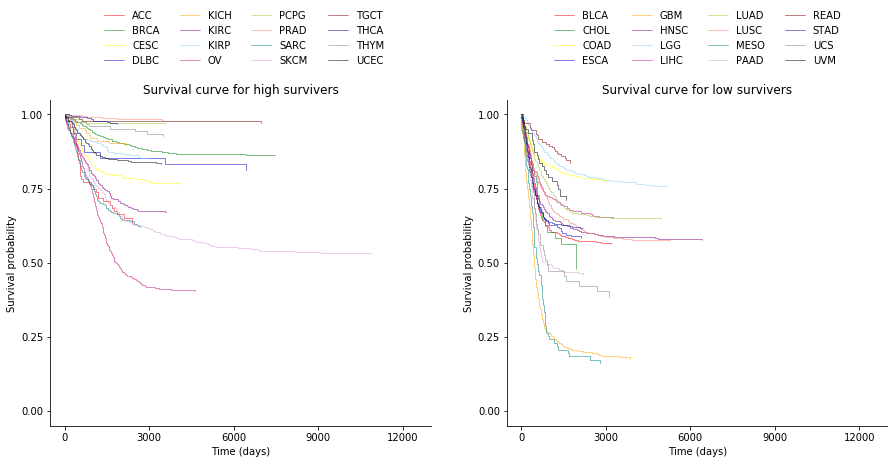

In [14]:
#High surviving cancers
plt.figure(figsize=(15, 6))
plt.subplot(121)
## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model and plot
kmf.fit(ACC_times, ACC_deaths,label='ACC')
kmf.plot(ci_show=False,linewidth=0.5, color='red')
kmf.fit(BRCA_times, BRCA_deaths,label='BRCA')
kmf.plot(ci_show=False,linewidth=0.5, color='green')
kmf.fit(CESC_times, CESC_deaths,label='CESC')
kmf.plot(ci_show=False,linewidth=0.5, color='yellow')
kmf.fit(DLBC_times, DLBC_deaths,label='DLBC')
kmf.plot(ci_show=False,linewidth=0.5, color='mediumblue')
kmf.fit(KICH_times,KICH_deaths,label='KICH')
kmf.plot(ci_show=False,linewidth=0.5, color='orange')
kmf.fit(KIRC_times,KIRC_deaths,label='KIRC')
kmf.plot(ci_show=False,linewidth=0.5, color='purple')
kmf.fit(KIRP_times,KIRP_deaths,label='KIRP')
kmf.plot(ci_show=False,linewidth=0.5, color='lightskyblue')
kmf.fit(OV_times,OV_deaths,label='OV')
kmf.plot(ci_show=False,linewidth=0.5, color='mediumvioletred')
kmf.fit(PCPG_times,PCPG_deaths,label='PCPG')
kmf.plot(ci_show=False,linewidth=0.5, color='yellowgreen')
kmf.fit(PRAD_times,PRAD_deaths,label='PRAD')
kmf.plot(ci_show=False,linewidth=0.5, color='salmon')
kmf.fit(SARC_times,SARC_deaths,label='SARC')
kmf.plot(ci_show=False,linewidth=0.5, color='teal')
kmf.fit(SKCM_times,SKCM_deaths,label='SKCM')
kmf.plot(ci_show=False,linewidth=0.5, color='plum')
kmf.fit(TGCT_times,TGCT_deaths,label='TGCT')
kmf.plot(ci_show=False,linewidth=0.5, color='maroon')
kmf.fit(THCA_times,THCA_deaths,label='THCA')
kmf.plot(ci_show=False,linewidth=0.5, color='darkblue')
kmf.fit(THYM_times,THYM_deaths,label='THYM')
kmf.plot(ci_show=False,linewidth=0.5, color='grey')
kmf.fit(UCEC_times,UCEC_deaths,label='UCEC')
kmf.plot(ci_show=False,linewidth=0.5, color='black')

# edit plot layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_xlim(-500,13000)
plt.gca().set_ylim(-0.05,1.05)
plt.xticks([0,3000,6000,9000,12000])
plt.yticks([0,0.25,0.50,0.75,1.0])
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.title('Survival curve for high survivers')
plt.legend(bbox_to_anchor=(0.9,1.3), ncol=4, frameon=False)

# ---------------------------------------------------------------------- 2nd plot
# Low surviving cancers
plt.subplot(122)

## Fit the data into the model and plot
kmf.fit(BLCA_times, BLCA_deaths,label='BLCA')
kmf.plot(ci_show=False,linewidth=0.5, color='red')
kmf.fit(CHOL_times, CHOL_deaths,label='CHOL')
kmf.plot(ci_show=False,linewidth=0.5, color='green')
kmf.fit(COAD_times, COAD_deaths,label='COAD')
kmf.plot(ci_show=False,linewidth=0.5, color='yellow')
kmf.fit(ESCA_times, ESCA_deaths,label='ESCA')
kmf.plot(ci_show=False,linewidth=0.5, color='mediumblue')
kmf.fit(GBM_times,GBM_deaths,label='GBM')
kmf.plot(ci_show=False,linewidth=0.5, color='orange')
kmf.fit(HNSC_times,HNSC_deaths,label='HNSC')
kmf.plot(ci_show=False,linewidth=0.5, color='purple')
kmf.fit(LGG_times,LGG_deaths,label='LGG')
kmf.plot(ci_show=False,linewidth=0.5, color='lightskyblue')
kmf.fit(LIHC_times,LIHC_deaths,label='LIHC')
kmf.plot(ci_show=False,linewidth=0.5, color='mediumvioletred')
kmf.fit(LUAD_times,LUAD_deaths,label='LUAD')
kmf.plot(ci_show=False,linewidth=0.5, color='yellowgreen')
kmf.fit(LUSC_times,LUSC_deaths,label='LUSC')
kmf.plot(ci_show=False,linewidth=0.5, color='salmon')
kmf.fit(MESO_times,MESO_deaths,label='MESO')
kmf.plot(ci_show=False,linewidth=0.5, color='teal')
kmf.fit(PAAD_times,PAAD_deaths,label='PAAD')
kmf.plot(ci_show=False,linewidth=0.5, color='plum')
kmf.fit(READ_times,READ_deaths,label='READ')
kmf.plot(ci_show=False,linewidth=0.5, color='maroon')
kmf.fit(STAD_times,STAD_deaths,label='STAD')
kmf.plot(ci_show=False,linewidth=0.5, color='darkblue')
kmf.fit(UCS_times,UCS_deaths,label='UCS')
kmf.plot(ci_show=False,linewidth=0.5, color='grey')
kmf.fit(UVM_times,UVM_deaths,label='UVM')
kmf.plot(ci_show=False,linewidth=0.5, color='black')

# edit plot layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_xlim(-500,13000)
plt.gca().set_ylim(-0.05,1.05)
plt.xticks([0,3000,6000,9000,12000])
plt.yticks([0,0.25,0.50,0.75,1.0])
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.title('Survival curve for low survivers')
plt.legend(bbox_to_anchor=(0.9,1.3), ncol=4, frameon=False)

In [252]:
print("The total amount of data entries is",sum([len(Types[x]) for x in Types if isinstance(Types[x], list)])) 

The total amount of data entries is 10965
